In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_finance import candlestick_ochl
import talib
import numpy as np

In [2]:
stock_data = pd.read_csv('stock_day.csv')
stock_data = stock_data.sort_index()

In [3]:
stock_data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


## MACD

1、MACD首先行计算出快速（一般选12日）移动平均值与慢速（一般选26日）移动平均值    
2、12日EMA数值减去26日EMA数值得到，差离值DIF      
3、根据离差值计算其9日的EMA，即离差平均值，是所求的MACD值。为了不与指标原名相混淆，又名DEA或DEM(讯号线)      
4、DIF与DEA的差值，为MACD柱状图     

In [4]:
macd, sign, macd_hist = talib.MACD(stock_data['close'][:200].values, fastperiod=12, slowperiod=26, signalperiod=9)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


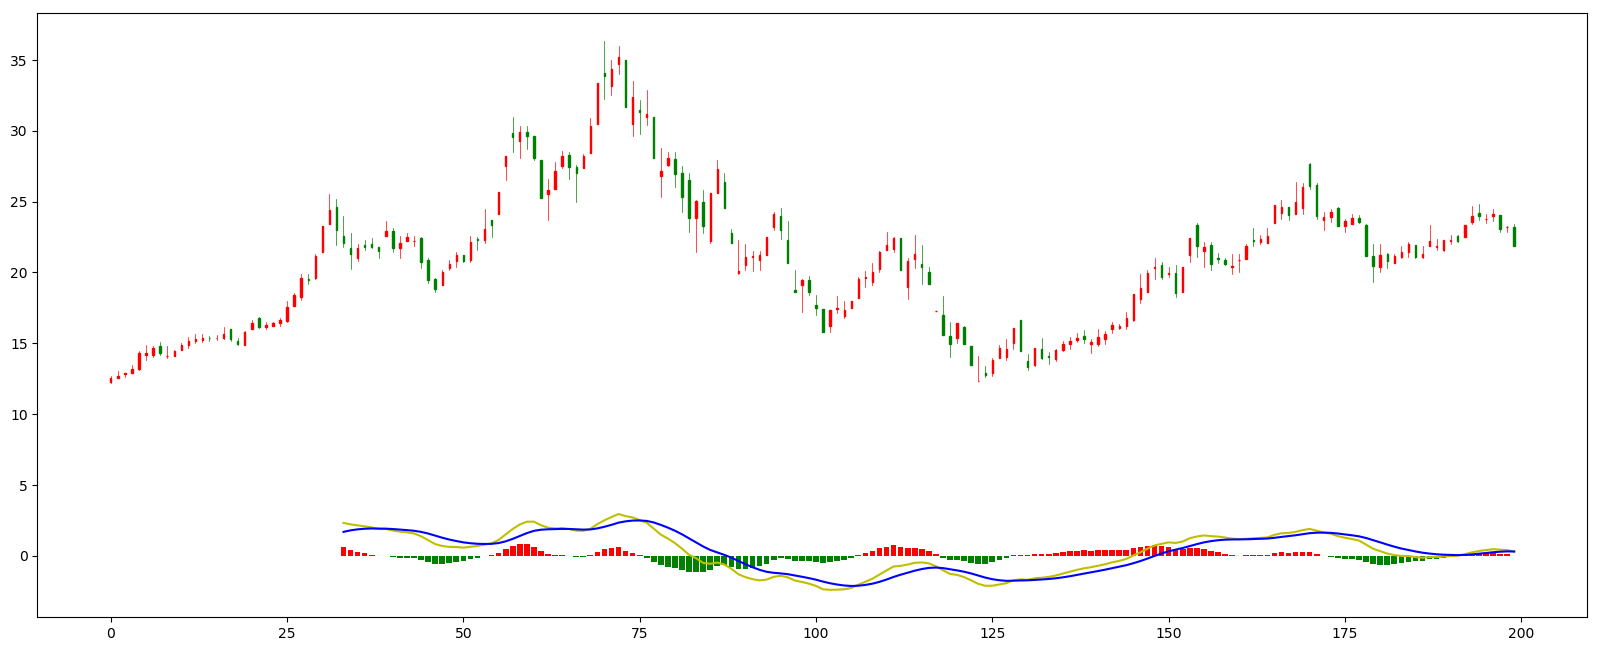

In [5]:
#绘制日k线
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (20,8),dpi=100) 
values = stock_data[['open','close','high','low']][:200]
values['time'] = [i for i in range(200)]
values = values[['time','open','close','high','low']].values
candlestick_ochl(axes,values,colorup='r',colordown='g')

index = [i for i in range(200)]

dif, dea, macd_hist = talib.MACD(stock_data['close'][:200].values, fastperiod=12, slowperiod=26, signalperiod=9)

plt.plot(index, dif, color='y', label="差离值 DIF")
plt.plot(index, dea, color='b', label="讯号线 DEA")

# 画出MACD柱状图
# 分开正负的柱状图去画出来
# 画第一个bar， macd_hist，如果大于0， 保留当前值，如果小于0，变为0，得出一个red_hist
# 画出第二个bar，macd_hisr，如果小于0， 保留当前值，如果大于0，直接变为0
red_hist = np.where(macd_hist > 0 , macd_hist, 0)
green_hist = np.where(macd_hist < 0 , macd_hist, 0)

plt.bar(index, red_hist, label="红色MACD值", color='r')
plt.bar(index, green_hist, label="绿色MACD值", color='g')


plt.show()

差离值（DIF）形成“快线”（短期线），讯号线（DEM）形成“慢线”（长期线）。
当差离值（DIF）从下而上穿过讯号线（DEM），为买进讯号(金叉)；相反若从上而下穿越，为卖出讯号。(死叉)

In [6]:
for i in index:
    if dif[i-1]<dea[i-1] and dif[i]>dea[i]:
        print("第{}天有买入信号".format(i))
    if dif[i-1]>dea[i-1] and dif[i]<dea[i]:
        print("第{}天有卖出信号".format(i))

第38天有卖出信号
第54天有买入信号
第65天有卖出信号
第68天有买入信号
第76天有卖出信号
第106天有买入信号
第118天有卖出信号
第128天有买入信号
第173天有卖出信号
第192天有买入信号
第199天有卖出信号


## RSI

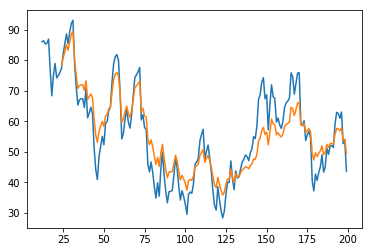

In [7]:
short_rsi = talib.RSI(stock_data['close'][:200].values, timeperiod=12)
long_rsi = talib.RSI(stock_data['close'][:200].values, timeperiod=24)
plt.plot(index,short_rsi)
plt.plot(index,long_rsi)

## BOLL

- 中轨线(MA)=N日的移动平均线    
- 上轨线(UP)=中轨线＋两倍的标准差    
- 下轨线(DN)=中轨线－两倍的标准差   

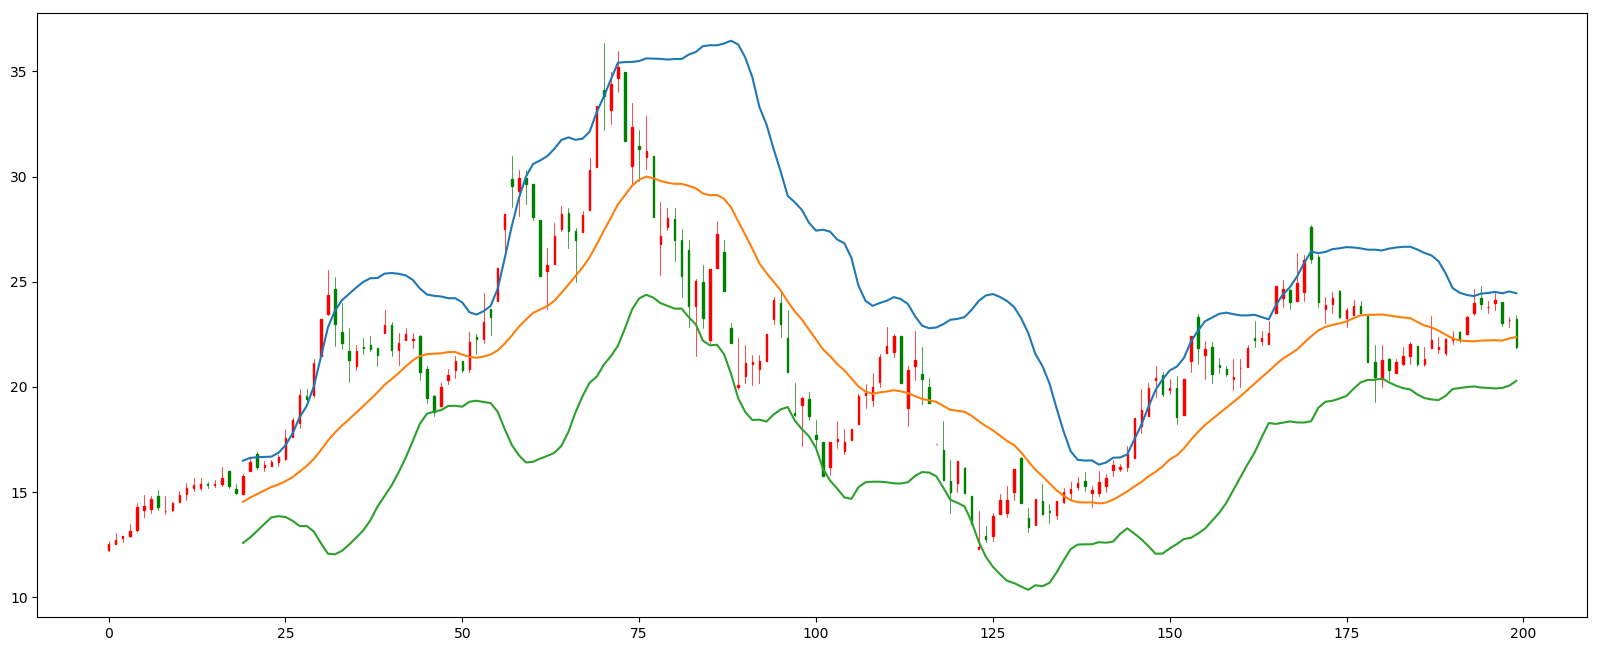

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (20,8),dpi=100) 
values = stock_data[['open','close','high','low']][:200]
values['time'] = [i for i in range(200)]
values = values[['time','open','close','high','low']].values
candlestick_ochl(axes,values,colorup='r',colordown='g')

up,mid,down = talib.BBANDS(stock_data['close'][:200],timeperiod=20,nbdevup=2,nbdevdn=2)
plt.plot(index,up,label='上轨线')
plt.plot(index,mid,label='中轨线')
plt.plot(index,down,label='下轨线')

In [23]:
values[:,2]

array([12.52, 12.7 , 12.9 , 13.16, 14.28, 14.31, 14.65, 14.3 , 14.11,
       14.47, 14.87, 15.18, 15.31, 15.38, 15.34, 15.38, 15.68, 15.3 ,
       14.93, 15.77, 16.42, 16.17, 16.29, 16.44, 16.66, 17.54, 18.42,
       19.62, 19.43, 21.13, 23.24, 24.38, 22.97, 22.06, 21.27, 21.71,
       21.82, 21.81, 21.5 , 22.92, 21.75, 22.09, 22.49, 22.25, 20.72,
       19.47, 18.81, 20.  , 20.58, 21.21, 20.78, 22.14, 22.28, 23.07,
       23.32, 25.65, 28.22, 29.54, 29.92, 29.66, 28.07, 25.27, 25.8 ,
       27.18, 28.24, 27.42, 27.  , 28.19, 30.31, 33.34, 33.85, 34.39,
       35.21, 31.69, 32.35, 31.33, 31.2 , 28.07, 27.19, 28.05, 26.97,
       25.29, 23.83, 25.01, 23.27, 25.61, 27.28, 24.56, 22.1 , 20.08,
       21.12, 21.16, 21.23, 22.5 , 24.14, 22.99, 20.69, 18.65, 19.45,
       18.6 , 17.51, 15.77, 17.35, 17.51, 17.35, 17.98, 19.54, 19.7 ,
       20.  , 21.41, 21.95, 22.4 , 20.16, 20.79, 21.29, 20.36, 19.21,
       17.29, 15.56, 14.97, 16.46, 14.95, 13.46, 12.36, 12.77, 13.85,
       14.63, 14.62,

股价在中轨上方运行时属较安全状态，短线可持有观望。
股价在中轨下方运行时属较危险状态，短线应趁反弹中轨时离场。
股价突破上轨线后，回探中轨线时不跌破中轨线，显示后市看涨，可持股或加仓。
股价跌破下轨线后，反弹中轨线时不站回中轨线以上，则后市看跌，要卖出。
通道突然呈急剧变窄收拢形状时，显示股价方向将会发生重大转折，这时结合其他指数技术进行行情判断。

In [24]:
for i in index:
    if stock_data['close'][i] < down[i] and stock_data['close'][i+1] > down[i+1]:
        print("第{}天有买入信号".format(i))
    if stock_data['close'][i] > up[i] and stock_data['close'][i+1] < down[i+1]:
        print("第{}天有卖出信号".format(i))

第46天有买入信号
第101天有买入信号
第123天有买入信号


In [25]:
help(talib.BBANDS)

Help on function BBANDS in module talib._ta_lib:

BBANDS(...)
    BBANDS(real[, timeperiod=?, nbdevup=?, nbdevdn=?, matype=?])
    
    Bollinger Bands (Overlap Studies)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 5
        nbdevup: 2
        nbdevdn: 2
        matype: 0 (Simple Moving Average)
    Outputs:
        upperband
        middleband
        lowerband



In [81]:
l = np.array((np.nan,1,np.nan))

In [84]:
all(np.isnan(l))

False

In [85]:
np.isnan(l)

array([ True, False,  True])